In [10]:
import os
import shutil
import tarfile
import shelve
import tarfile
import discretize
# import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Download Topography and Observed gravity data
url = "https://storage.googleapis.com/simpeg/Chile_GRAV_4_Miller/Chile_GRAV_4_Miller.tar.gz"
downloads = discretize.utils.download(url, overwrite=True)
basePath = downloads.split(".")[0]

# unzip the tarfile
tar = tarfile.open(downloads, "r")
tar.extractall()
tar.close()

# Download the inverted model
f = discretize.utils.download(
    "https://storage.googleapis.com/simpeg/laguna_del_maule_slicer.tar.gz"
)
tar = tarfile.open(f, "r")
tar.extractall()
tar.close()

with shelve.open('./laguna_del_maule_slicer/laguna_del_maule-result') as db:
    mesh = db['mesh']
    Lpout = db['Lpout']

# Load the mesh/data
mesh = discretize.TensorMesh.copy(mesh)
models = {'Lpout':Lpout}

   saved to: /Users/lindseyjh/git/simpeg-research/plotting-example/Chile_GRAV_4_Miller.tar.gz
Download completed!
   saved to: /Users/lindseyjh/git/simpeg-research/plotting-example/laguna_del_maule_slicer.tar.gz
Download completed!


In [5]:
mesh

TensorMesh: 190,440 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     69    355,000.00    372,250.00    250.00    250.00    1.00
   y     69  5,999,000.00  6,016,250.00    250.00    250.00    1.00
   z     40     -5,250.00      3,000.00    100.00    350.00    1.21

In [9]:
mod = Lpout.reshape(mesh.vnC, order="F")

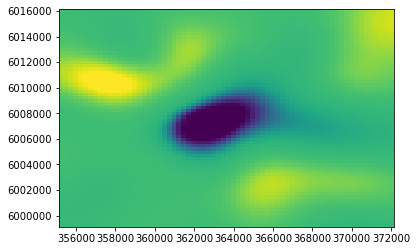

In [11]:
plt.pcolormesh(mesh.vectorCCx, mesh.vectorCCy, mod[:, :, 10])

In [12]:
x = mesh.vectorCCx
y = mesh.vectorCCy
z = mesh.vectorCCz
model = mod

In [13]:
data = {
    "x":x,
    "y":y, 
    "z":z, 
    "model":model
}

In [15]:
import deepdish as dd

In [18]:
dd.io.save("laguna_del_maule_miller.h5", data)